In [3]:
import pandas as pd

df = pd.read_excel(r"C:\Users\disha\Downloads\youtube_comments_1000.xlsx")

print(df.head())

  comment_id     username                                  comment_text  \
0      c_521    Diyaxo301      I have mixed feelings So well produced 😢   
1      c_737   Pooja00830                           Love this so much 🤣   
2      c_740  Aarav001577  On repeat 🔁 Love this so much 🔥 Anyone else?   
3      c_660   Nehaoff720                   Amazing video! Anyone else?   
4      c_411  Ishaan11776                                Amazing video!   

   like_count  reply_count         published_at sentiment  contains_emoji  \
0          16            0  2025-05-17 22:23:34   neutral            True   
1           8            0  2025-04-17 12:31:38  positive            True   
2          20            0  2023-07-27 05:33:22  positive            True   
3          18            0  2024-05-22 22:09:27  positive           False   
4           9            0  2023-05-28 01:03:20  positive           False   

  language  is_reply parent_comment_id  \
0       en     False               NaN   
1 

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# One-time setup: download NLTK data if you haven't already
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Assuming 'df' is your DataFrame that is already loaded.
# If not, uncomment the line below and replace with your file path
# df = pd.read_excel('your_file_name.xlsx')

# 1. Remove missing rows
df.dropna(subset=['comment_text'], inplace=True)

# 3. Make every text in the text column lower case
df['lowercase_comment_text'] = df['comment_text'].astype(str).str.lower()

# 4. Remove special characters
df['no_special_chars'] = df['lowercase_comment_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# 2. Tokenize it
df['tokenized_comment_text'] = df['no_special_chars'].apply(word_tokenize)

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df['comment_text_no_stopwords'] = df['tokenized_comment_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

print(df.head())

  comment_id     username                                  comment_text  \
0      c_521    Diyaxo301      I have mixed feelings So well produced 😢   
1      c_737   Pooja00830                           Love this so much 🤣   
2      c_740  Aarav001577  On repeat 🔁 Love this so much 🔥 Anyone else?   
3      c_660   Nehaoff720                   Amazing video! Anyone else?   
4      c_411  Ishaan11776                                Amazing video!   

   like_count  reply_count         published_at sentiment  contains_emoji  \
0          16            0  2025-05-17 22:23:34   neutral            True   
1           8            0  2025-04-17 12:31:38  positive            True   
2          20            0  2023-07-27 05:33:22  positive            True   
3          18            0  2024-05-22 22:09:27  positive           False   
4           9            0  2023-05-28 01:03:20  positive           False   

  language  is_reply parent_comment_id  \
0       en     False               NaN   
1 

In [7]:
df.to_excel('updated_reviews 7.xlsx', index=False)

print("Successfully saved the updated DataFrame to 'updated_reviews.xlsx'")

Successfully saved the updated DataFrame to 'updated_reviews.xlsx'


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming 'df' is your DataFrame with the preprocessed text.
# If you are in a new session, load the data first:
# df = pd.read_excel('reviews_with_sentiment.xlsx')

# The 'text_no_stopwords' column is a list of words. We need to join them back into a string.
# If you didn't create this in the sentiment analysis step, create it now.
if 'processed_text_string' not in df.columns:
    df['processed_text_string'] = df['comment_text_no_stopwords'].apply(lambda x: ' '.join(x))

# 1. Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['processed_text_string'])

# 2. Apply NMF
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# 3. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print("\n")

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, num_top_words)

Topic #1:
heard best ive amazing video better interesting day lyrics curious


Topic #2:
goosebumps gave amazing video repeat day taste long nice skip


Topic #3:
talent pure repeat thanks uploading produced nice curious lyrics overrated


Topic #4:
masterpiece produced amazing video meh skip mixed feelings nice taste


Topic #5:
love incredible vocals day produced long amazing video meh okay




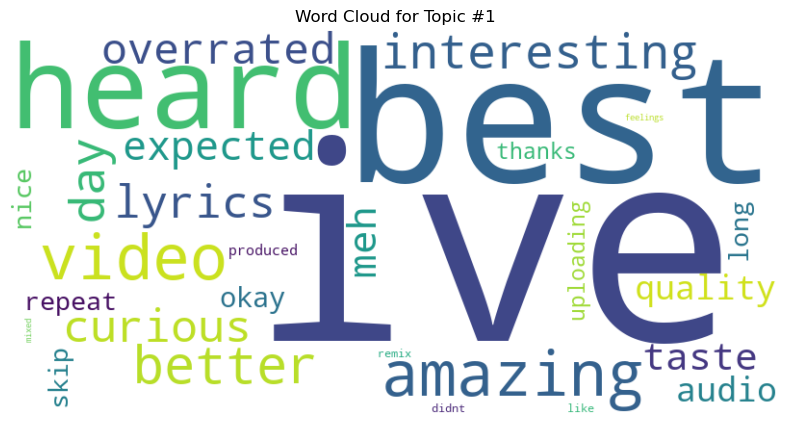

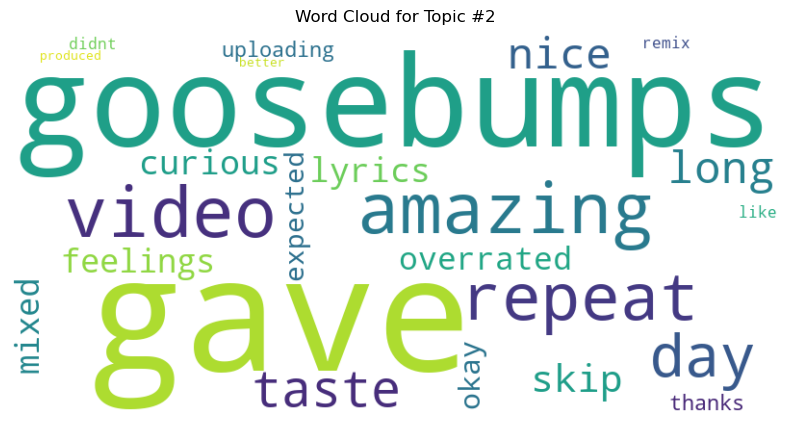

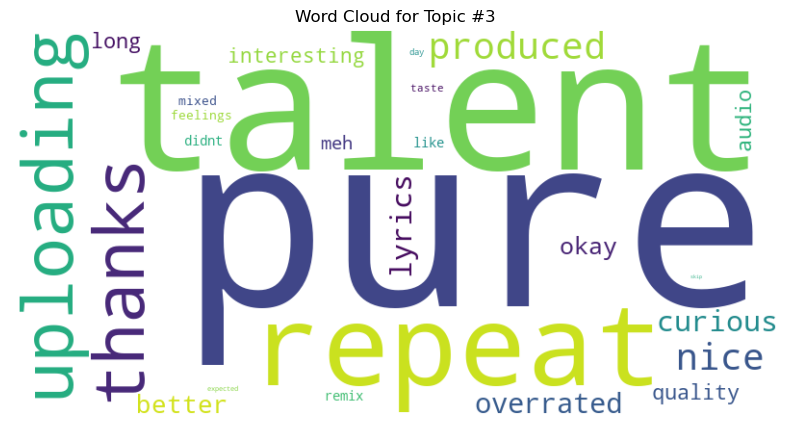

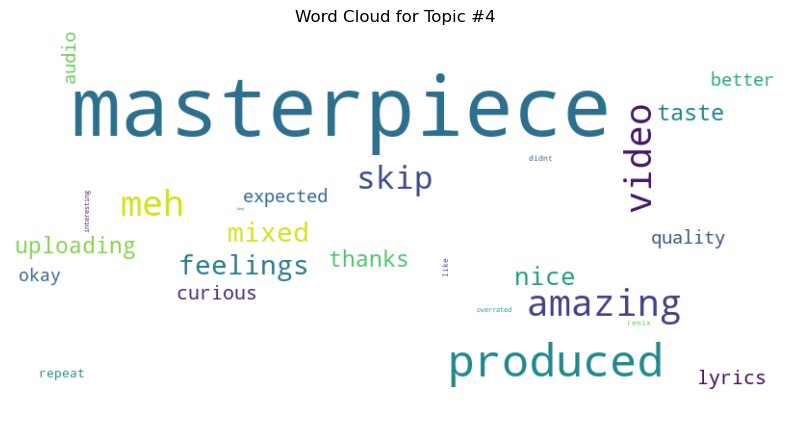

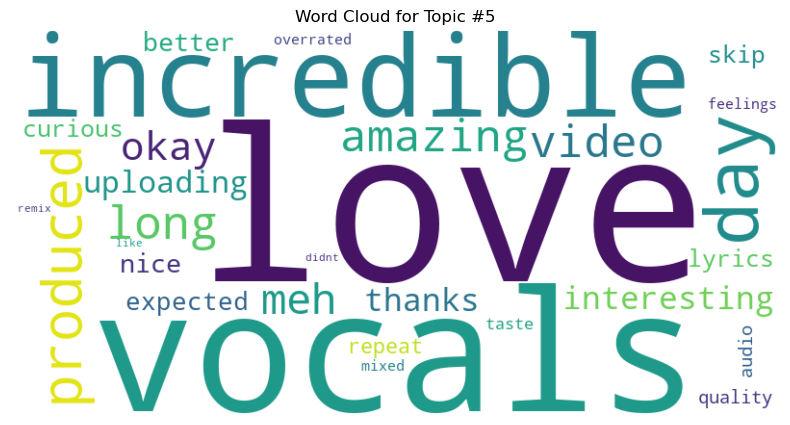

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'nmf_model' and 'vectorizer' are available from the previous step.
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic to generate and display a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic #{topic_idx + 1}")
    plt.show()

In [9]:
from nltk.util import ngrams
from collections import Counter
import re

# 1. Load your data
df = pd.read_excel(r"C:\Users\disha\Downloads\youtube_comments_1000.xlsx")

# 2. Prepare the text
# Ensure the column is string type and handle any potential empty cells
df['comment_text_no_stopwords'].fillna('', inplace=True)

# Combine all text into one large list of words
# .split() will separate words based on spaces
all_words = [word for text in df['comment_text_no_stopwords'] for word in text.split()]

# --- Bigram Analysis ---

# 3. Generate and count bigrams
bigrams = ngrams(all_words, 2)
bigram_counts = Counter(bigrams)

# 4. Format and display the most common bigrams
# We join the tuple of words back into a string for readability
most_common_bigrams = [(' '.join(gram), count) for gram, count in bigram_counts.most_common(20)]
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

print("--- Top 20 Most Common Bigrams ---")
print(bigram_df)
print("\n" + "="*40 + "\n")


# --- Trigram Analysis ---

# 5. Generate and count trigrams
trigrams = ngrams(all_words, 3)
trigram_counts = Counter(trigrams)

# 6. Format and display the most common trigrams
most_common_trigrams = [(' '.join(gram), count) for gram, count in trigram_counts.most_common(20)]
trigram_df = pd.DataFrame(most_common_trigrams, columns=['Trigram', 'Frequency'])

print("--- Top 20 Most Common Trigrams ---")
print(trigram_df)

KeyError: 'comment_text_no_stopwords'